В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
file_id = '1XPsBPpJrtA50VdDyhnF9tYdUbT4eWctn'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [11]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [8]:
df.dtypes

,0
Car_ID,int64
Brand,object
Model,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,int64
Engine,int64


In [9]:
for col in df.select_dtypes(include=['object']).columns:
    actual_types = df[col].apply(lambda x: type(x)).unique()
    print(f"{col}: {actual_types}")

Brand: [<class 'str'>]
Model: [<class 'str'>]
Fuel_Type: [<class 'str'>]
Transmission: [<class 'str'>]
Owner_Type: [<class 'str'>]


In [10]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} значень -> {df[col].unique()}")

Brand: 11 значень -> ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Model: 58 значень -> ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Fuel_Type: 2 значень -> ['Petrol' 'Diesel']
Transmission: 2 значень -> ['Manual' 'Automatic']
Owner_Type: 3 значень -> ['First' 'Second' 'Third']


В наборі даних 8 числових і 5 категоріальних колонок з них:
- 2 бінарні (Fuel_Type, Transmission)
- 2 мультикатегоріальні (Brand, Model)
- 1 колонка, в якій можна встановити відношення порядку (Owner_Type)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [13]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(f"Розмір X_train: {X_train.shape}")
print(f"Розмір X_test: {X_test.shape}")
print(f"Розмір y_train: {y_train.shape}")
print(f"Розмір y_test: {y_test.shape}")

Розмір X_train: (80, 12)
Розмір X_test: (20, 12)
Розмір y_train: (80,)
Розмір y_test: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [14]:
fuel_majority = X_train['Fuel_Type'].value_counts().idxmax()
trans_majority = X_train['Transmission'].value_counts().idxmax()
print(f"Fuel_Type: {fuel_majority}")
print(f"Transmission: {trans_majority}")

X_train['Fuel_Type'] = (X_train['Fuel_Type'] == fuel_majority).astype(int)
X_test['Fuel_Type'] = (X_test['Fuel_Type'] == fuel_majority).astype(int)

X_train['Transmission'] = (X_train['Transmission'] == trans_majority).astype(int)
X_test['Transmission'] = (X_test['Transmission'] == trans_majority).astype(int)

print(X_train[['Fuel_Type', 'Transmission']].head())

Fuel_Type: Petrol
Transmission: Automatic
    Fuel_Type  Transmission
83          1             1
55          0             1
26          1             1
54          1             0
19          1             1


In [17]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[['Brand']])
brand_cols = encoder.get_feature_names_out(['Brand'])
X_train_brand = pd.DataFrame(encoder.transform(X_train[['Brand']]),
                             columns=brand_cols,
                             index=X_train.index)
X_test_brand = pd.DataFrame(encoder.transform(X_test[['Brand']]),
                            columns=brand_cols,
                            index=X_test.index)
X_train = pd.concat([X_train, X_train_brand], axis=1)
X_test = pd.concat([X_test, X_test_brand], axis=1)
X_train = X_train.drop('Brand', axis=1)
X_test = X_test.drop('Brand', axis=1)
print(brand_cols)

['Brand_Audi' 'Brand_BMW' 'Brand_Ford' 'Brand_Honda' 'Brand_Hyundai'
 'Brand_Mahindra' 'Brand_Maruti' 'Brand_Mercedes' 'Brand_Tata'
 'Brand_Toyota' 'Brand_Volkswagen']


In [18]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [19]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Ми створюємо нову колонку Owner_Type_Codes в якій замінюємо текст на числа з чіткою послідовністю.

In [20]:
X_train = X_train.drop('Owner_Type', axis=1)
X_test = X_test.drop('Owner_Type', axis=1)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

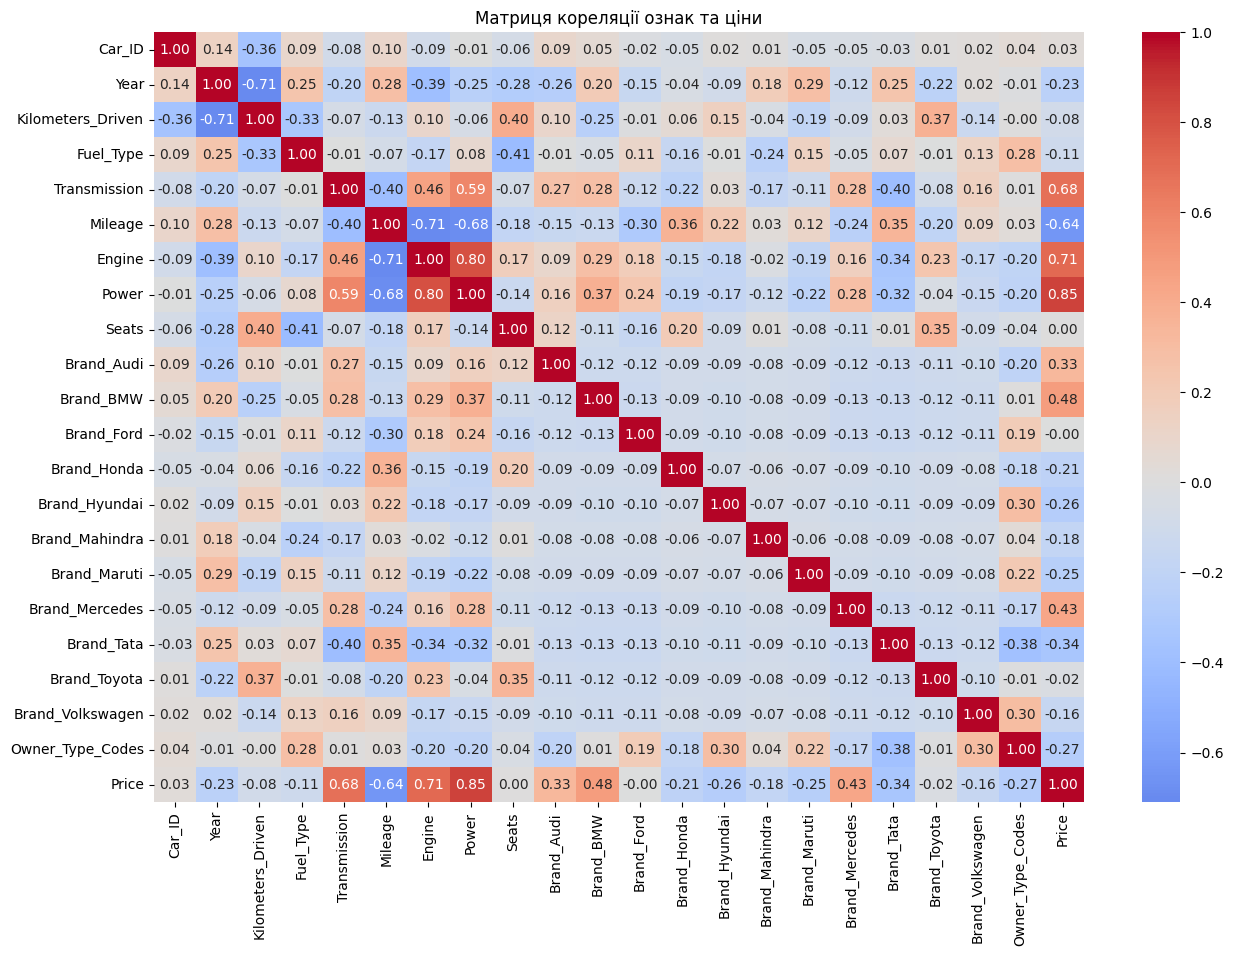

Ознаки з кореляцією > 0.5 за модулем:
Price           1.000000
Power           0.849137
Engine          0.710561
Transmission    0.680731
Mileage        -0.638404
Name: Price, dtype: float64


In [22]:
X_train_numeric = X_train.select_dtypes(include=[np.number])
train_combined = pd.concat([X_train_numeric, y_train], axis=1)
corr_matrix = train_combined.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матриця кореляції ознак та ціни')
plt.show()

price_corr = corr_matrix['Price'].sort_values(ascending=False)
significant_features = price_corr[abs(price_corr) > 0.5]
print("Ознаки з кореляцією > 0.5 за модулем:")
print(significant_features)

На основі побудованої матриці кореляції найбільш значущо корелюють наступні колонки:
- Power (0.85) - Чим більша потужність двигуна, тим дорожче авто
- Engine (0.71) - Об'єм двигуна впливає на вартість
- Transmission (0.68) - Машини з автоматичною коробкою передач коштують більше
- Mileage (-0.64) - Негативна кореляція. Чим більша витрата палива, тим меншою є його ціна

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

RMSE на тренувальних даних: 210342.80
RMSE на тестувальних даних: 259601.27


/tmp/ipython-input-3291004555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3291004555.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


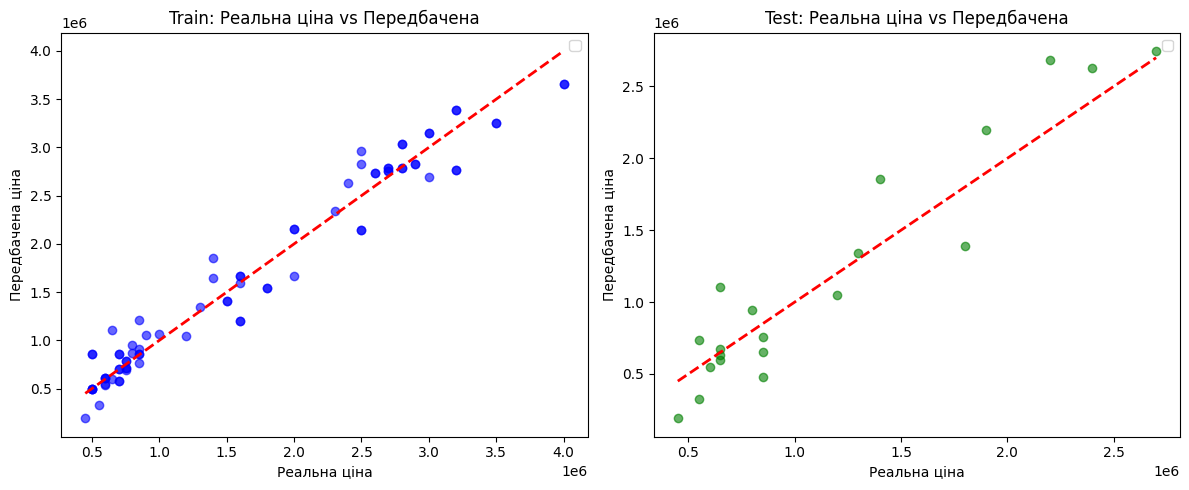

In [26]:
X_train_final = X_train.select_dtypes(include=[np.number]).drop(['Car_ID'], axis=1)
X_test_final = X_test.select_dtypes(include=[np.number]).drop(['Car_ID'], axis=1)

model = LinearRegression()
model.fit(X_train_final, y_train)

y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE на тренувальних даних: {rmse_train:.2f}")
print(f"RMSE на тестувальних даних: {rmse_test:.2f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Train: Реальна ціна vs Передбачена')
plt.xlabel('Реальна ціна')
plt.ylabel('Передбачена ціна')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Test: Реальна ціна vs Передбачена')
plt.xlabel('Реальна ціна')
plt.ylabel('Передбачена ціна')
plt.legend()

plt.tight_layout()
plt.show()

Модель демонструє хорошу якість. Вона не перенавчена, оскільки помилка на тесті лише трохи більша за помилку на тренуванні. На графіках помітно, що модель іноді помиляється на дорогих авто.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coefficients = pd.Series(model_scaled.coef_, index=X_train_final.columns).sort_values(ascending=False)
print("Коефіцієнти моделі після масштабування:")
print(coefficients)

Коефіцієнти моделі після масштабування:
Power                500000.506765
Brand_Mercedes       209257.737636
Brand_BMW            208105.079738
Brand_Audi           206123.092108
Transmission         115153.439599
Owner_Type_Codes      43335.066079
Brand_Toyota          17619.429555
Seats                 -1744.048812
Year                 -11604.260975
Engine               -24683.084080
Brand_Honda          -63112.339850
Brand_Tata           -65558.490423
Brand_Volkswagen     -93391.358093
Kilometers_Driven    -99713.958682
Brand_Maruti        -112786.673613
Brand_Ford          -119069.155830
Mileage             -131884.633123
Brand_Mahindra      -140931.632855
Brand_Hyundai       -151916.052473
Fuel_Type           -185245.840763
dtype: float64


Чим більше абсолютне значення коефіцієнта, тим сильніше ця ознака впливає на ціну.Позитивні - всі ці ознаки роблять авто комфортнішим або престижнішим, що збільшує ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [38]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_final.columns, index=X_train_final.index)
X_train_sm = sm.add_constant(X_train_scaled_df)

model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

p_values = model_sm.pvalues
significant_features = p_values[p_values < 0.05].index.tolist()
if 'const' in significant_features: significant_features.remove('const')
print("\nСтатистично значущі ознаки на рівні 0.05:")
print(significant_features)
features_25 = p_values[p_values < 0.25].index.tolist()
if 'const' in features_25: features_25.remove('const')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           2.34e-34
Time:                        21:32:15   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.72e+0

Список статистично значущих ознак Power,Fuel_Type, Transmission, Mileage,Brand_Audi, Brand_BMW, Brand_Mercedes, Brand_Hyundai, Brand_Mahindra, Brand_Maruti, Brand_Ford, Brand_Volkswagen.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [33]:
X_train_significant = X_train_scaled_df[significant_features]
X_train_sm_sig = sm.add_constant(X_train_significant)

model_sig = sm.OLS(y_train, X_train_sm_sig).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           4.12e-39
Time:                        21:21:45   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06   2.78e+04  

 Зміни незначні. R2 зменшився на 0.008 і Adj. R-squared зменшився на 0.003. Отримали модель, яка працює майже так само.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [40]:
X_train_10 = X_train_scaled_df[features_25]
X_train_sm_10 = sm.add_constant(X_train_10)

model_10 = sm.OLS(y_train, X_train_sm_10).fit()

print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           4.85e-38
Time:                        21:33:18   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

R2 зменшився на 0.001, а Adj. R-squared збільшилося на 0.002. Залишив би для використання модель із Завдання 10.